# Plot

Fetch the evaluation result:

In [69]:
import os
import json

results = []
folders = os.listdir("../result")
folders.sort()
for folder in folders:
    if folder.startswith("LLaMA") is True:
        continue
    # Get result file
    d = os.listdir("../result/" + folder)[0]
    if d.startswith("results") is not True: 
        d = os.listdir("../result/" + folder)[1]

    # Read the result
    path = f"../result/{folder}/{d}"
    with open(path, "r") as f:
        result = json.load(f)
        score = result["results"]["medmcqa"]["acc,none"]
        if folder == "Llama3.1-8B-Instruct-hf":
            baseline = score
        else:
            ckpt_num = int(folder.split('-')[-1])
            results.append([f"{ckpt_num:0=4d}", score])
            
print(baseline)
results.sort()
checkpoints, scores = zip(*results)
checkpoints = list(checkpoints)
scores = list(scores)

0.590963423380349


ValueError: not enough values to unpack (expected 2, got 0)

Merge the result as one json file:

In [63]:
import json
trainer_log_path = "../saves/LLaMA3.1-8B-Chat/dora/trainer_log.jsonl"

with open(trainer_log_path, "r") as f:
    results = [json.loads(l) for l in f.readlines()]
    dora_losses = [r["loss"] for r in results]
    dora_lrs = [r["learning_rate"] for r in results] 
    dora_steps = [r["current_steps"] for r in results]   
    dora_epochs = [r["epoch"] for r in results]
    
dora_map = {}
for e, s in zip(dora_epochs, dora_steps):
    if int(s) % 100 == 0 or int(s) == 585:
        dora_map[f'{s:0=4d}'] = e
        
print(dora_map)

{'0100': 0.256, '0200': 0.512, '0300': 0.768, '0400': 1.024, '0500': 1.28, '0585': 1.4976}


Save results as an jsonl file:

In [64]:
import json
with open("../result/LLaMA3.1-8B-Chat_dora_medmcqa.jsonl", "w") as f:
    for c, s in zip(checkpoints, scores):
        f.write("{\"acc\": %f, \"ckpt\": %d, \"epoch\": %f}\n" % (s, int(c), dora_map[c]))

Plot:

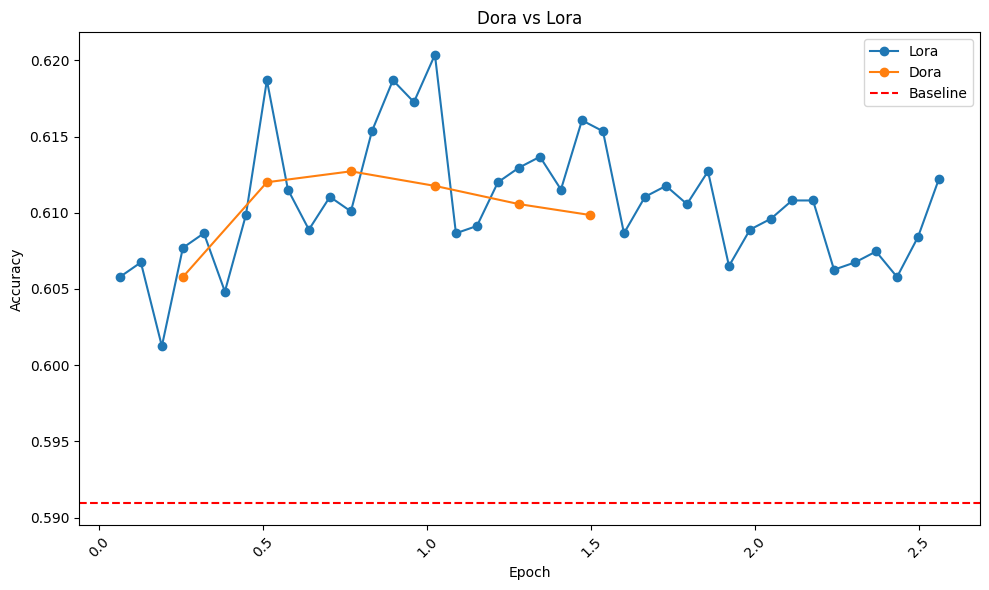

In [4]:
import json
import matplotlib.pyplot as plt

baseline = 0.590963423380349

with open("../result/LLaMA3.1-8B-Chat_lora_medmcqa.jsonl", "r") as f:
    data = [json.loads(l) for l in f.readlines()]
    lora_checkpoints = [d["ckpt"] for d in data]
    lora_epochs = [d["epoch"] for d in data]
    lora_scores = [d["acc"] for d in data]

with open("../result/LLaMA3.1-8B-Chat_dora_medmcqa.jsonl", "r") as f:
    data = [json.loads(l) for l in f.readlines()]
    dora_checkpoints = [d["ckpt"] for d in data]
    dora_epochs = [d["epoch"] for d in data]
    dora_scores = [d["acc"] for d in data]


# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(lora_epochs, lora_scores, marker='o', label='Lora')
plt.plot(dora_epochs, dora_scores, marker='o', label='Dora')
plt.axhline(y=baseline, color='r', linestyle='--', label='Baseline')

# Adding titles and labels
plt.title('Dora vs Lora')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

Fetch the data of training:

In [75]:
import json
trainer_log_path = "../saves/LLaMA3.1-8B-Chat/lora/trainer_log.jsonl"

with open(trainer_log_path, "r") as f:
    results = [json.loads(l) for l in f.readlines()]
    lora_losses = [r["loss"] for r in results]
    lora_lrs = [r["learning_rate"] for r in results] 
    lora_steps = [r["current_steps"] for r in results]   
    lora_epochs = [r["epoch"] for r in results]
    
lora_map = {}
for e, s in zip(lora_epochs, lora_steps):
    if int(s) % 100 == 0:
        lora_map[s] = lora_epochs


import json
trainer_log_path = "../saves/LLaMA3.1-8B-Chat/dora/trainer_log.jsonl"

with open(trainer_log_path, "r") as f:
    results = [json.loads(l) for l in f.readlines()]
    dora_losses = [r["loss"] for r in results]
    dora_lrs = [r["learning_rate"] for r in results]
    dora_steps = [r["current_steps"] for r in results]
    dora_epochs = [r["epoch"] for r in results]  
    
dora_map = {}
for e, s in zip(dora_epochs, dora_steps):
    if int(s) % 100 == 0:
        dora_map[s] = dora_epochs

Plot loss:

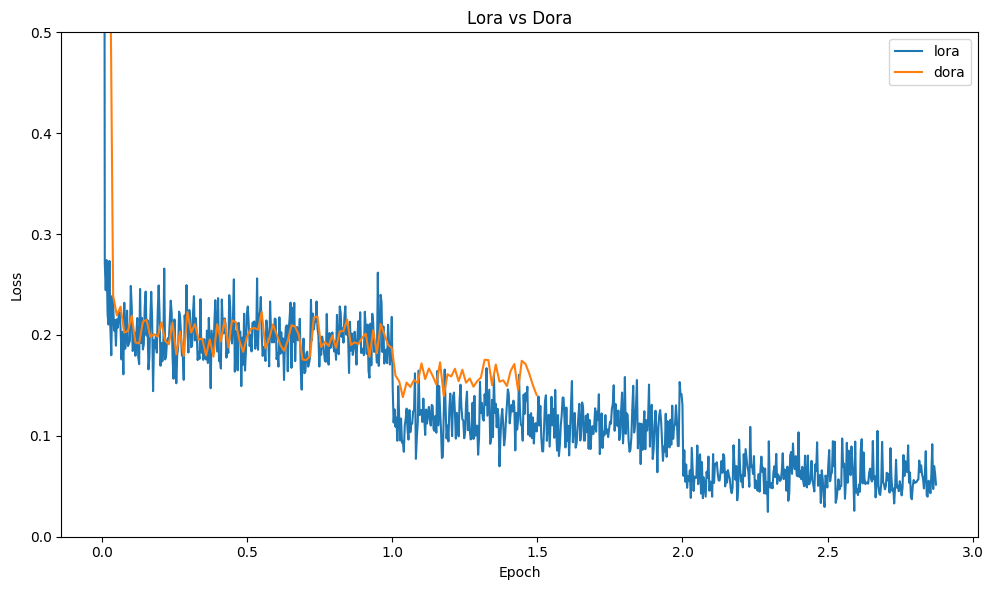

In [76]:
import matplotlib.pyplot as plt

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(lora_epochs, lora_losses, label='lora')
plt.plot(dora_epochs, dora_losses, label='dora')

# Adding titles and labels
plt.title('Lora vs Dora')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Display the plot
plt.tight_layout()
plt.ylim([0, 0.5])
plt.show()

In [129]:
import json

baseline_path="../result/Llama3.1-8B-Instruct-hf/samples_medmcqa_2024-09-05T00-40-58.792484.jsonl"
with open(baseline_path, "r") as f:
    failed_data = [json.loads(l) for l in f.readlines()]
    failed_data = [d for d in failed_data if d["acc"] == 0]
    
ckpt_1600_path="../result/saves__LLaMA3.1-8B-Chat__lora__checkpoint-1600/samples_medmcqa_2024-09-05T13-34-52.368743.jsonl"
with open(ckpt_1600_path, "r") as f:
    passed_data = [json.loads(l) for l in f.readlines()]
    passed_data = [d for d in passed_data if d["acc"] == 1]

In [130]:
failed_id = [d["doc_id"] for d in failed_data]
passed_id = [d["doc_id"] for d in passed_data]

In [131]:
answer=["A","B","C","D"]
for i, id in enumerate(failed_id):
    if id in passed_id:
        print(repr(failed_data[i]["arguments"]["gen_args_0"]["arg_0"]))
        print(answer[failed_data[i]["doc"]["cop"]])
        print("-"*7)

'Question: A 29 yrs old woman with a pregnancy of 17 week has a 10 years old boy with down syndrome. She does not want another down syndrome kid; best advice to her is\nChoices:\nA. No test is required now as her age is below 35 years\nB. Ultra sound at this point of time will definitely tell her that next baby will be down syndromic or not\nC. Amniotic fluid samples plus chromosomal analysis will definitely tell her that next baby will be down syndromic or not\nD. blood screening at this point of time will clear the exact picture\nAnswer:'
C
-------
'Question: Gait apraxia is seen in thromboembolic episode involving:\nChoices:\nA. ACA\nB. MCA\nC. PCA\nD. Posterior choroidal aery\nAnswer:'
A
-------
'Question: A patient who was on ventilator and being ventilated for past few days, suddenly pulls out the endotracheal tube. What is the next step of management?\nChoices:\nA. Assess the patient, give bag and mask ventilation and look for spontaneous breathing\nB. Sta bag and mask ventilati